# Brain Tumour Detection

This code is designed to train and evaluate CNN models (VGG16, EfficientNetB0, MNASNet) for brain tumor detection on MRI images and compare their efficacy. The process includes several steps: data preparation, image preprocessing, model training, model performance evaluation, and prediction on your own image.

During project development, the following parameters were involved:

**Software**
- OS: Windows 11
- Python 3.9.15 (Anaconda)
- IDE: PyCharm + Jupyter Notebook

**Hardware**
- CPU: i5-10300H
- RAM: 16GB
- GPU: NVIDIA GeForce GTX 1650 Ti (4 GB)

## Install the dataset from Kaggle

The dataset for training and testing the model was taken from the Kaggle platform (https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data). And has the following characteristics:
- **Data Type**: MRI images
- **Dataset Size**: 253 files
- **File Formats**: JPG, PNG, JPEG
- **Image Sizes**: Varying
- **Categories**:
  - Tumor present (yes): 155 images
  - No tumor (no): 98 images

In [10]:
! pip install kaggle

In [11]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors



  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:07, 1.88MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:02, 5.32MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:00, 12.7MB/s]
 73%|#######2  | 11.0M/15.1M [00:00<00:00, 19.0MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 20.9MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 15.0MB/s]


In [16]:
import zipfile

with zipfile.ZipFile("brain-mri-images-for-brain-tumor-detection.zip", "r") as zip_ref:
    zip_ref.extractall(".")

## Package and library import

The following major libraries are involved in the project:
- PyTorch
- PyTorch Lightning
- NumPy
- OpenCV
- Scikit-learn
- Matplotlib

In [ ]:
import numpy
import torch
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning import Trainer

from COV_brain_tumor_detection import (
    create_data_loaders,
    TEST_DIR,
    TRAIN_DIR,
    VAL_DIR,
    BrainTumorModelVGG16,
    BrainTumorModelEfficientNet,
    BrainTumorModelMNASNet,
    preprocess_images,
    load_data,
    split_data,
    clean_directory,
    save_new_images,
    plot_confusion_matrix,
    plot_data_distribution,
    plot_model_performance,
    plot_samples
)

## Preparing data

In [2]:
split_data("brain_tumor_dataset")

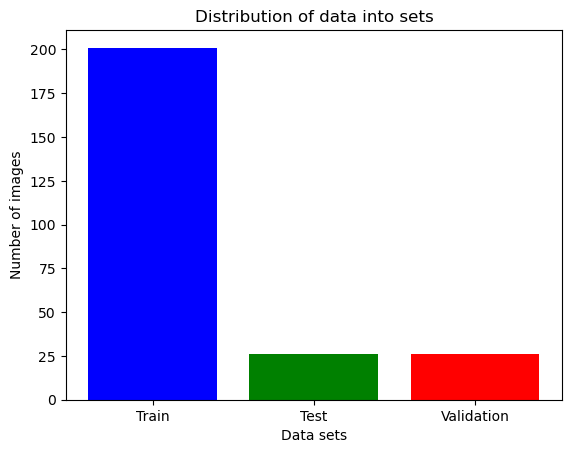

In [3]:
plot_data_distribution()

In [4]:
X_train, y_train, labels = load_data(TRAIN_DIR)
X_test, y_test, _ = load_data(TEST_DIR)
X_val, y_val, _ = load_data(VAL_DIR)

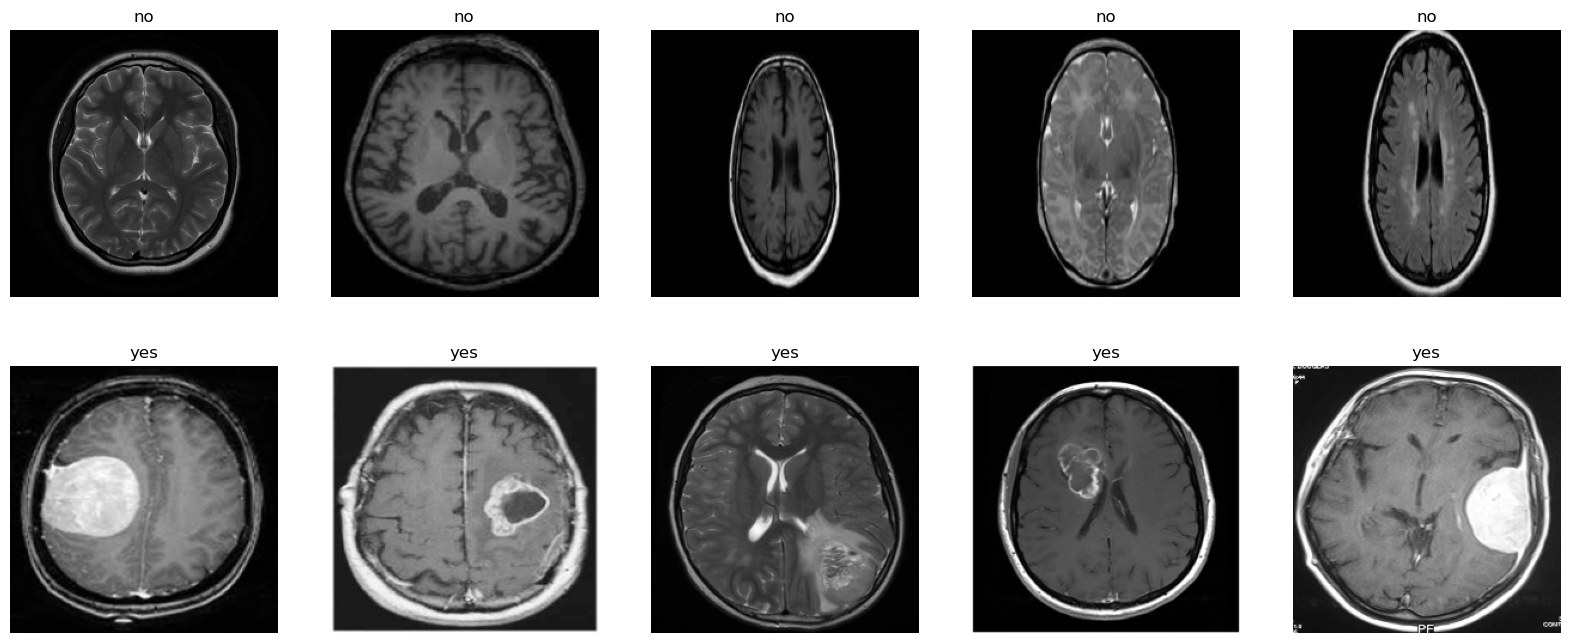

In [5]:
plot_samples(X_train, y_train, labels)

## Image preprocessing

In [6]:
X_train_prep = preprocess_images(X_train)
X_val_prep = preprocess_images(X_val)
X_test_prep = preprocess_images(X_test)

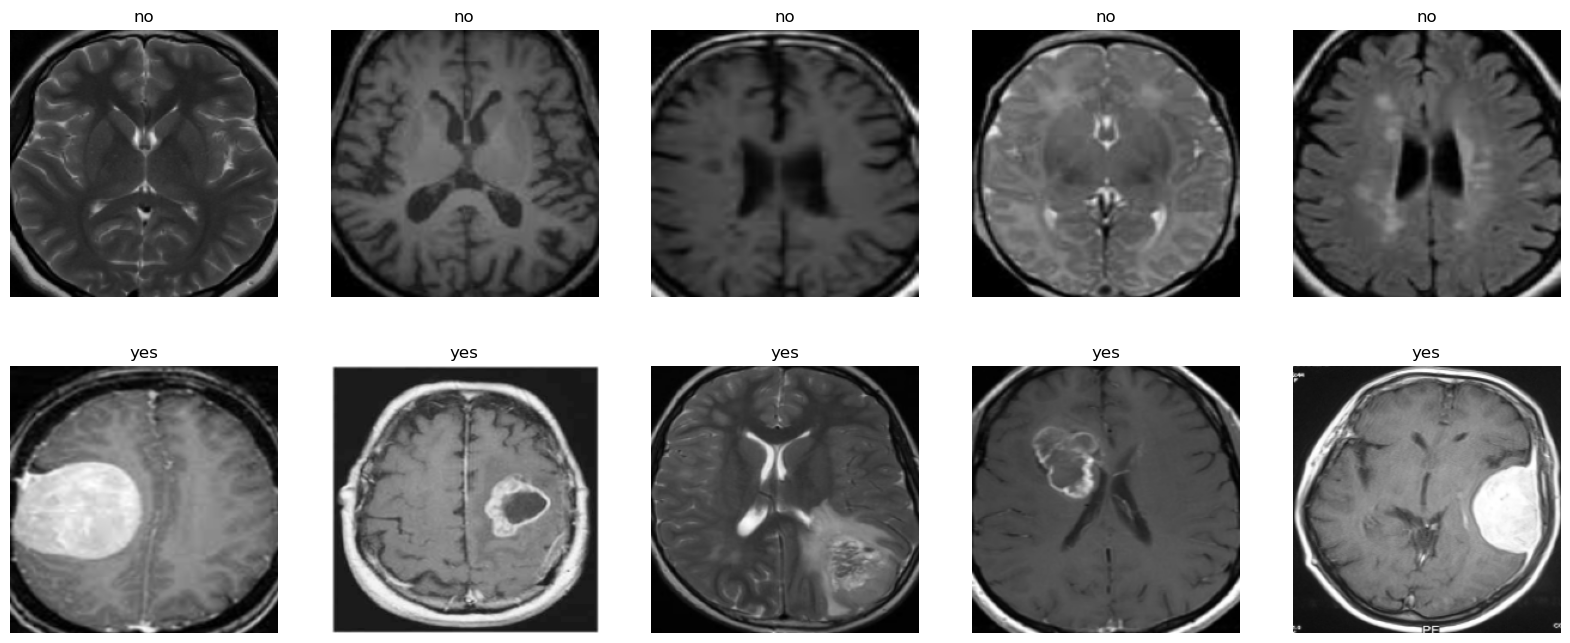

In [7]:
plot_samples(X_train_prep, y_train, labels)

## Saving and clearing data

In [8]:
save_new_images(X_train_prep, y_train, folder_name=TRAIN_DIR)
save_new_images(X_val_prep, y_val, folder_name=VAL_DIR)
save_new_images(X_test_prep, y_test, folder_name=TEST_DIR)

In [9]:
clean_directory(TRAIN_DIR)
clean_directory(VAL_DIR)
clean_directory(TEST_DIR)

In [10]:
train_loader, val_loader = create_data_loaders(X_train_prep, y_train)

## VGG16

### Model development and training

In [ ]:
model_vgg16 = BrainTumorModelVGG16()

In [12]:
print(model_vgg16)

BrainTumorModelVGG16(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [24]:
# trainer = Trainer(
#     max_epochs=30,
#     accelerator='gpu',
#     log_every_n_steps=6,
#     callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=6)],
#     logger=True
# )
# trainer.fit(model_vgg16, train_loader, val_loader)
# 
# with open("COV_brain_tumor_detection/histories/model_vgg16_history.pkl", "wb") as file_pi:
#     pickle.dump(model_vgg16.history, file_pi)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type    | Params | Mode 
-----------------------------------------------
0 | base_model | VGG     | 14.7 M | train
1 | sigmoid    | Sigmoid | 0      | train
2 | loss       | BCELoss | 0      | train
-----------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.959    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

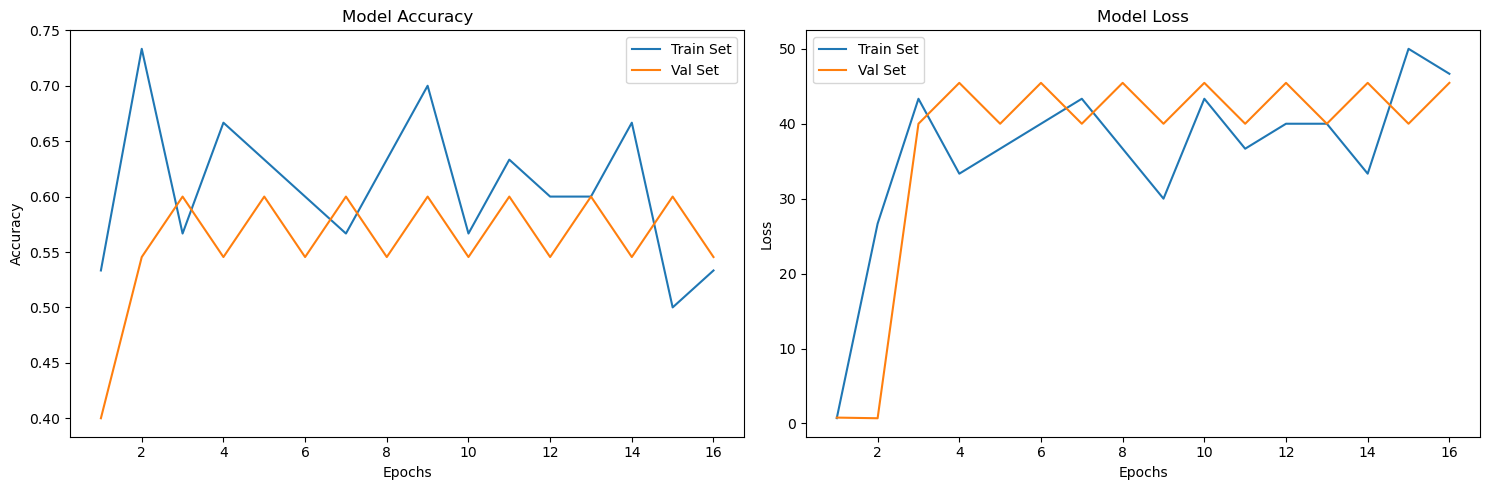

In [25]:
with open("COV_brain_tumor_detection/histories/model_vgg16_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [28]:
X_test_prep = numpy.transpose(X_test_prep, (0, 3, 1, 2))

X_test_tensor = torch.from_numpy(X_test_prep).float()

predictions_test = [1 if x > 0.5 else 0 for x in model_vgg16(X_test_tensor).detach().numpy()]

In [29]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.62


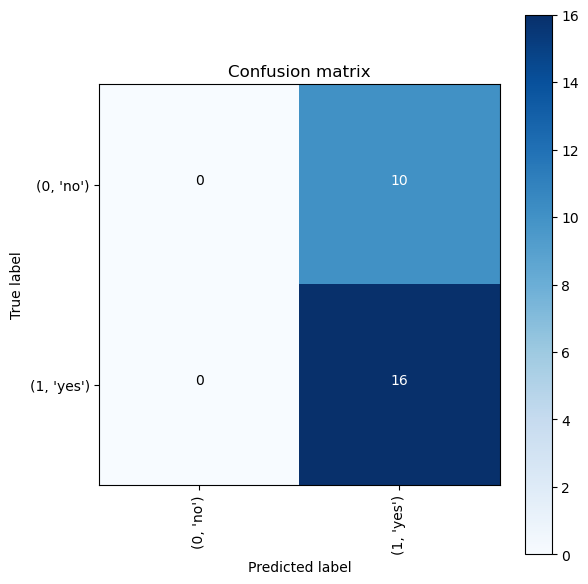

In [30]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~62%** (Target: >80%)
- Confusion Matrix: 
   - TP: **16**, TN: **0**, FP: **0**, FN: **10** (Target: achieve high overall classification accuracy)

## EfficientNet

### Model development and training

In [ ]:
model_efficientnet = BrainTumorModelEfficientNet()

In [28]:
print(model_efficientnet)

BrainTumorModelEfficientNet(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
   

In [58]:
# trainer = Trainer(
#     max_epochs=30,
#     accelerator='gpu',
#     log_every_n_steps=6,
#     callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=6)],
#     logger=True
# )
# trainer.fit(model_efficientnet, train_loader, val_loader)
# 
# with open("COV_brain_tumor_detection/histories/model_efficientnet_history.pkl", "wb") as file_pi:
#     pickle.dump(model_efficientnet.history, file_pi)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type         | Params | Mode 
----------------------------------------------------
0 | base_model | EfficientNet | 4.0 M  | train
1 | sigmoid    | Sigmoid      | 0      | train
2 | loss       | BCELoss      | 0      | train
----------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
16.035    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

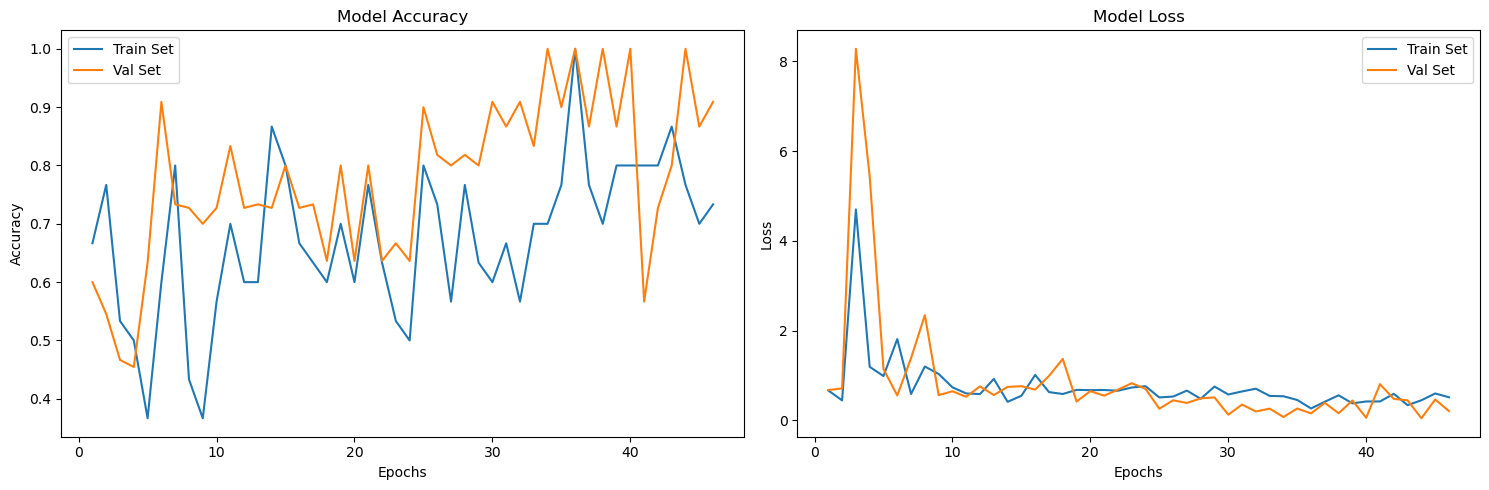

In [30]:
with open("COV_brain_tumor_detection/histories/model_efficientnet_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [33]:
X_test_prep = numpy.transpose(X_test_prep, (0, 3, 1, 2))

X_test_tensor = torch.from_numpy(X_test_prep).float()

predictions_test = [1 if x > 0.5 else 0 for x in model_efficientnet(X_test_tensor).detach().numpy()]

In [34]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.96


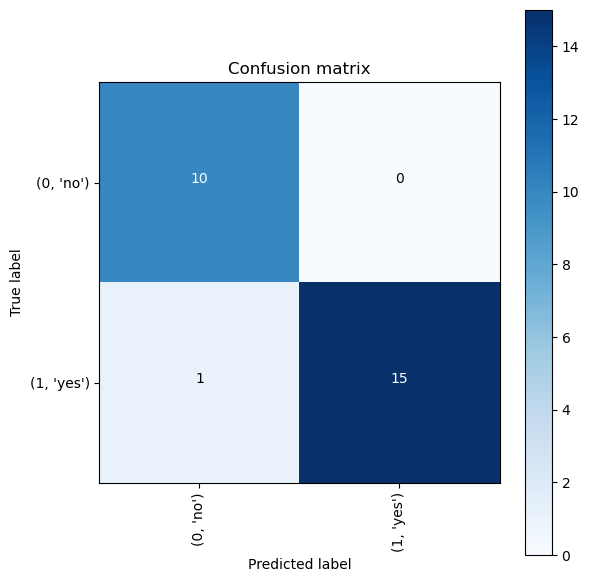

In [35]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~96%** (Target: >80%)
- Confusion Matrix: 
   - TP: **15**, TN: **10**, FP: **1**, FN: **0** (Target: achieve high overall classification accuracy)

## MNASNet

### Model development and training

In [ ]:
model_mnasnet = BrainTumorModelMNASNet()

In [16]:
print(model_mnasnet)

BrainTumorModelRegNet(
  (base_model): MNASNet(
    (layers): Sequential(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
      (4): BatchNorm2d(40, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (7): BatchNorm2d(24, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
      (8): Sequential(
        (0): _InvertedResidual(
          (layers): Sequential(
            (0): Conv2d(24, 72, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(72, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats

In [17]:
# trainer = Trainer(
#     max_epochs=30,
#     accelerator='gpu',
#     log_every_n_steps=6,
#     callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=6)],
#     logger=True
# )
# trainer.fit(model_mnasnet, train_loader, val_loader)
# 
# with open("COV_brain_tumor_detection/histories/model_mnasnet_history.pkl", "wb") as file_pi:
#     pickle.dump(model_regnet.history, file_pi)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type    | Params | Mode 
-----------------------------------------------
0 | base_model | MNASNet | 5.0 M  | train
1 | sigmoid    | Sigmoid | 0      | train
2 | loss       | BCELoss | 0      | train
-----------------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
20.010    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

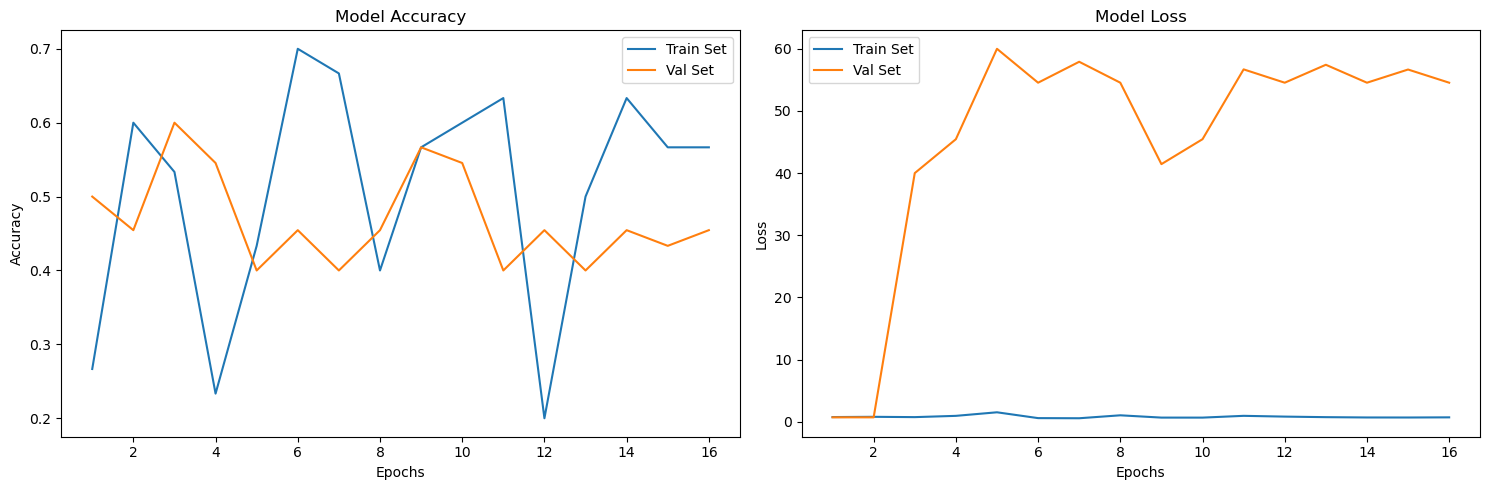

In [18]:
with open("COV_brain_tumor_detection/histories/model_mnasnet_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [19]:
X_test_prep = numpy.transpose(X_test_prep, (0, 3, 1, 2))

X_test_tensor = torch.from_numpy(X_test_prep).float()

predictions_test = [1 if x > 0.5 else 0 for x in model_mnasnet(X_test_tensor).detach().numpy()]

In [20]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.77


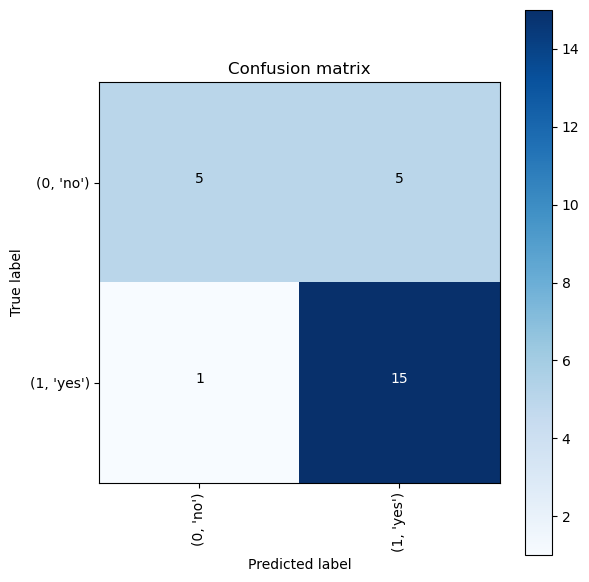

In [21]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~77%** (Target: >80%)
- Confusion Matrix: 
   - TP: **15**, TN: **5**, FP: **1**, FN: **5** (Target: achieve high overall classification accuracy)

## Example of testing the EfficientNet model on personal image

In [16]:
from PIL import Image
from torchvision import transforms

In [17]:
def predict_tumor(img_path, model):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.unsqueeze(0)

    model.eval()
    with torch.no_grad():
        prediction = model(img_tensor)
    
    if prediction.item() > 0.5:
        return "The tumour was found"
    else:
        return "No tumour was found"

In [18]:
image_path = 'yes_tumor_example.jpg'

In [19]:
result = predict_tumor(image_path, model_efficientnet)
print(result)

The tumour was found
